# 2. hands-on session: ***Star vs Quasar*: Decision tree**

# **What does a good dataset look like?**

- enough data points
- not so much omitted data
- distinguishable features
- representative features
- good parameter-space coverage
- unbiased dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc("font", size=15)
pd.options.display.float_format = "{:,.2g}".format
pd.set_option('display.max_rows', 20)

## **Cats vs Dogs**

Exemplary problem: distinguish between *cats* and *dogs* based on their **heights** and **widths**.

In [2]:
Ndog, Ncat = 60, 40

height = np.hstack((np.random.uniform(11, 50, size=Ndog), 
                    np.random.uniform(9, 20, size=Ncat)))

width = np.hstack((np.random.uniform(7, 25, size=Ndog), 
                   np.random.uniform(5, 14, size=Ncat)))

y = Ndog*["Dog"] + Ncat*["Cat"]

df = pd.DataFrame({"height" : height, "width" : width, "species" : y})
df

,height,width,species
0,19,16,Dog
1,29,17,Dog
2,30,9.7,Dog
3,20,8.6,Dog
4,26,24,Dog
...,...,...,...
95,16,11,Cat
96,11,11,Cat
97,19,11,Cat
98,10,11,Cat


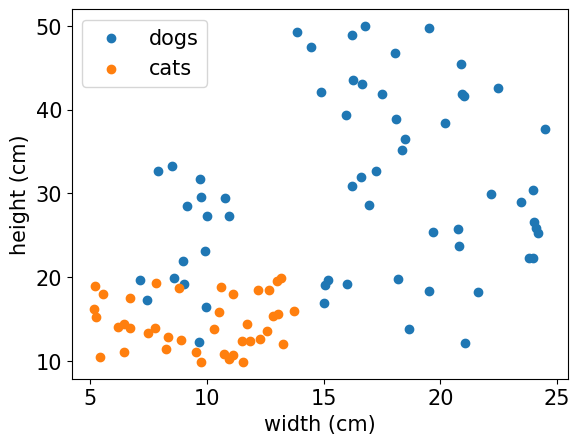

In [3]:
cats = df["species"] == "Cat"
dogs = df["species"] == "Dog"

plt.scatter(df.loc[dogs, "width"], df.loc[dogs, "height"], label="dogs")
plt.scatter(df.loc[cats, "width"], df.loc[cats, "height"], label="cats")

plt.xlabel("width (cm)");
plt.ylabel("height (cm)")
plt.legend();

### **Enough data points**

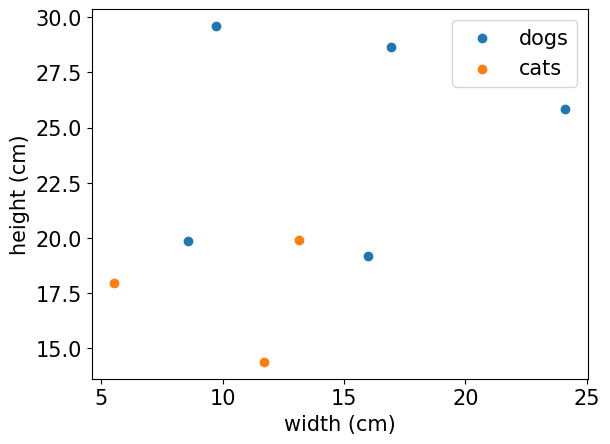

In [4]:
plt.scatter(df.loc[dogs, "width"][:5], df.loc[dogs, "height"][:5], label="dogs")
plt.scatter(df.loc[cats, "width"][:3], df.loc[cats, "height"][:3], label="cats")

plt.xlabel("width (cm)");
plt.ylabel("height (cm)")
plt.legend();

### **Not so much omitted data**

In [5]:
new = df.copy()

new.loc[::2, "width"] = np.NaN

new

,height,width,species
0,19,NaN,Dog
1,29,17,Dog
2,30,NaN,Dog
3,20,8.6,Dog
4,26,NaN,Dog
...,...,...,...
95,16,11,Cat
96,11,NaN,Cat
97,19,11,Cat
98,10,NaN,Cat


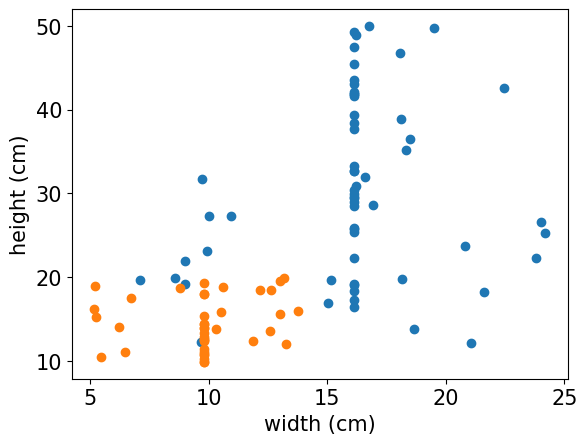

In [6]:
new.loc[cats, "width"] = new.loc[cats, "width"].fillna(np.mean(new.loc[cats, "width"]))
new.loc[dogs, "width"] = new.loc[dogs, "width"].fillna(np.mean(new.loc[dogs, "width"]))

plt.scatter(new[dogs]["width"], new[dogs]["height"], label="dogs")
plt.scatter(new[cats]["width"], new[cats]["height"], label="cats")

plt.xlabel("width (cm)")
plt.ylabel("height (cm)");

### **Distinguishable features**

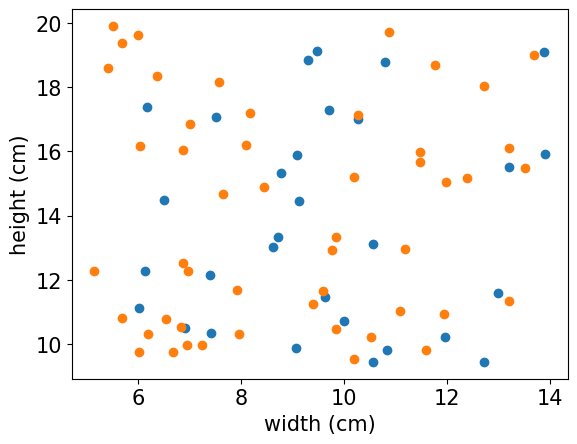

In [7]:
Ncat, Nchihuahua = 50, 30

height = np.hstack((np.random.uniform(9, 20, size=Nchihuahua), 
                    np.random.uniform(9, 20, size=Ncat)))

width = np.hstack((np.random.uniform(5, 14, size=Nchihuahua), 
                   np.random.uniform(5, 14, size=Ncat)))

y = Ncat * ["Cat"] + Nchihuahua * ["Chihuahua"]

df_new = pd.DataFrame({"height" : height, "width" : width, "species" : y})

cats_new = df_new["species"] == "Cat"
dogs_new = df_new["species"] == "Chihuahua"

plt.scatter(df_new.loc[dogs_new, "width"], df_new.loc[dogs_new, "height"], label="chihuahuas")
plt.scatter(df_new.loc[cats_new, "width"], df_new.loc[cats_new, "height"], label="cats")
plt.xlabel("width (cm)")
plt.ylabel("height (cm)");

### **Representative features**

In [8]:
Ndog, Ncat = 10, 10

legs = np.hstack((np.ones(Ndog)*4,
                  np.ones(Ncat)*4))

tail = np.hstack(([True for i in range(Ndog)],
                  [True for i in range(Ncat)]))

y = Ndog*["Dog"] + Ncat*["Cat"]

pd.DataFrame({"Legs" : legs, "Tail" : tail, "Species" : y})

,Legs,Tail,Species
0,4,True,Dog
1,4,True,Dog
2,4,True,Dog
3,4,True,Dog
4,4,True,Dog
5,4,True,Dog
6,4,True,Dog
7,4,True,Dog
8,4,True,Dog
9,4,True,Dog


### **Good parameter-space coverage**

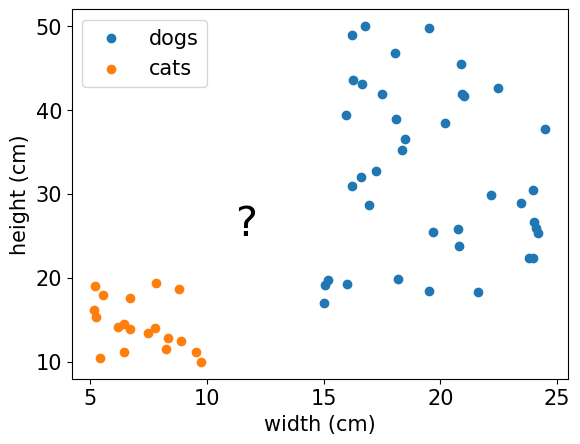

In [9]:
cond_dogs = (df.loc[dogs, "width"] > 15) & (df.loc[dogs, "height"] > 15)
cond_cats = (df.loc[cats, "width"] < 10) & (df.loc[cats, "height"] < 20)

plt.scatter(df.loc[dogs, "width"][cond_dogs], df.loc[dogs, "height"][cond_dogs], label="dogs")
plt.scatter(df.loc[cats, "width"][cond_cats], df.loc[cats, "height"][cond_cats], label="cats")
plt.text(11.2, 25, "?", size=30)

plt.xlabel("width (cm)");
plt.ylabel("height (cm)")
plt.legend();

### **Selection & sampling bias**

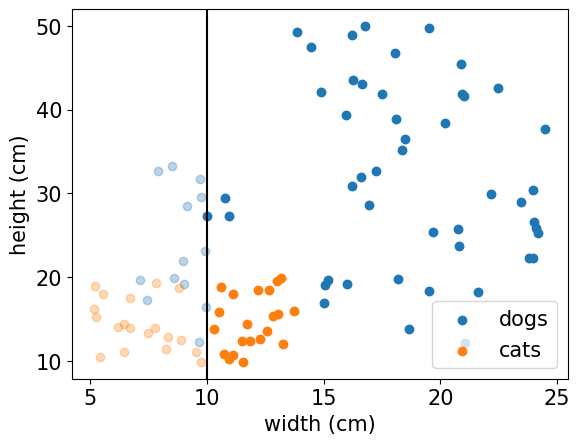

In [10]:
width_limit = 10

cond_dogs = df.loc[dogs, "width"] > width_limit
cond_cats = df.loc[cats, "width"] > width_limit

plt.scatter(df.loc[dogs, "width"], df.loc[dogs, "height"], alpha=0.3, color="C0")
plt.scatter(df.loc[dogs, "width"][cond_dogs], df.loc[dogs, "height"][cond_dogs], label="dogs", color="C0")
plt.scatter(df.loc[cats, "width"], df.loc[cats, "height"], color="C1", alpha=0.3)
plt.scatter(df.loc[cats, "width"][cond_cats], df.loc[cats, "height"][cond_cats], label="cats", color="C1")
plt.axvline(width_limit, color="k")

plt.xlabel("width (cm)")
plt.ylabel("height (cm)")
plt.legend(loc="lower right");

<img src="https://i.redd.it/fpjq7qswyp871.jpg" width=650 align=center style="padding-bottom:40px;padding-top:40px"></img>

#### **Example: Flux-limited studies (Malmquist bias)**

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Bias2.png" width=650 align=left style="padding-bottom:0px;padding-top:30px"></img>

#### **Example: Hot Jupiters**


<img src="https://drive.google.com/uc?export=view&id=1720xkETMsQiIKJU0QFtOZ0LTGUqHNFQJ" width="550px" align="left" style="padding-bottom:40px;padding-top:40px">

# **Where can you get a dataset?**

- [Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
- [Keras](https://keras.io/api/datasets/)
- [Kaggle](https://www.kaggle.com/datasets)
- [HuggingFace](https://huggingface.co/datasets)
- Internet: Photobanks, Weather, Stocks, Bitcoin

## **Scikit-learn Datasets**

### **Blobs & circles (clustering)**

```python
from sklearn import datasets

n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples)
...
...
```

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" align=left width=950 style="padding-bottom:40px;padding-top:20px">

### **Iris = kosatec (classification, clustering)**

<br>

<img src="https://www.aifunded.es/images/iris.png" align=left width=950 style="padding-bottom:25px">

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
df["type"] = [iris["target_names"][i] for i in iris["target"]]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3,5.2,2.3,virginica
146,6.3,2.5,5,1.9,virginica
147,6.5,3,5.2,2,virginica
148,6.2,3.4,5.4,2.3,virginica


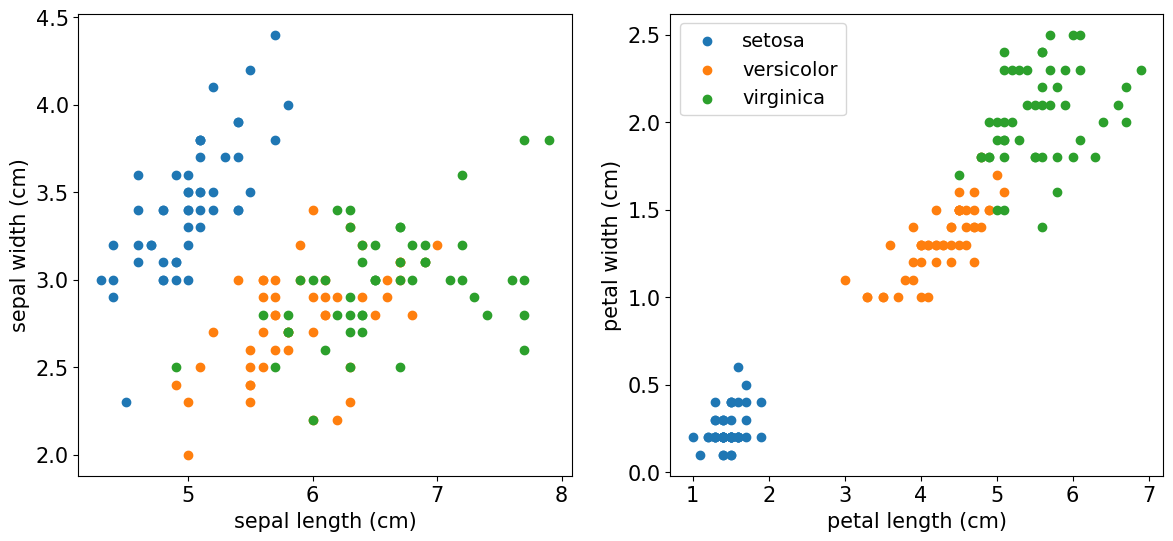

In [12]:
i1, i2, i3 = y == 0, y == 1, y == 2
setosa = df["type"] == "setosa"
versicolor = df["type"] == "versicolor"
virginica = df["type"] == "virginica"

plt.figure(figsize=(14,6))

plt.subplot(121)

col1, col2 = "sepal length (cm)", "sepal width (cm)"
plt.scatter(df.loc[setosa, col1], df.loc[setosa, col2])
plt.scatter(df.loc[versicolor, col1], df.loc[versicolor, col2])
plt.scatter(df.loc[virginica, col1], df.loc[virginica, col2])
plt.xlabel(col1)
plt.ylabel(col2)

plt.subplot(122)
col1, col2 = "petal length (cm)", "petal width (cm)"
plt.scatter(df.loc[setosa, col1], df.loc[setosa, col2], label="setosa")
plt.scatter(df.loc[versicolor, col1], df.loc[versicolor, col2], label="versicolor")
plt.scatter(df.loc[virginica, col1], df.loc[virginica, col2], label="virginica")
plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(fontsize=14);

### **California housing dataset (regression)**

In [13]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data["data"], columns=data['feature_names'])
df["MedHouseVal"] = data["target"]

pd.reset_option("display.float_format")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


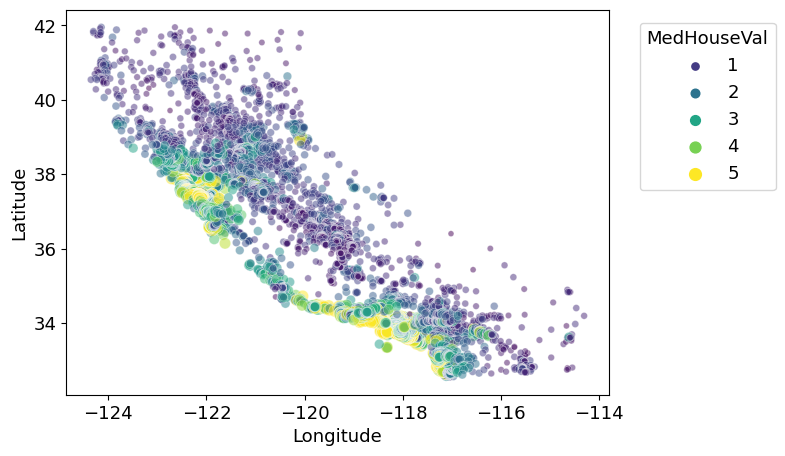

In [14]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(7,5))
plt.rc("font", size=13)
sns.scatterplot(data=df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.04, 0.99), loc="upper left");

### **MNIST digits (classification)**

2023-10-03 19:49:04.837798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28)

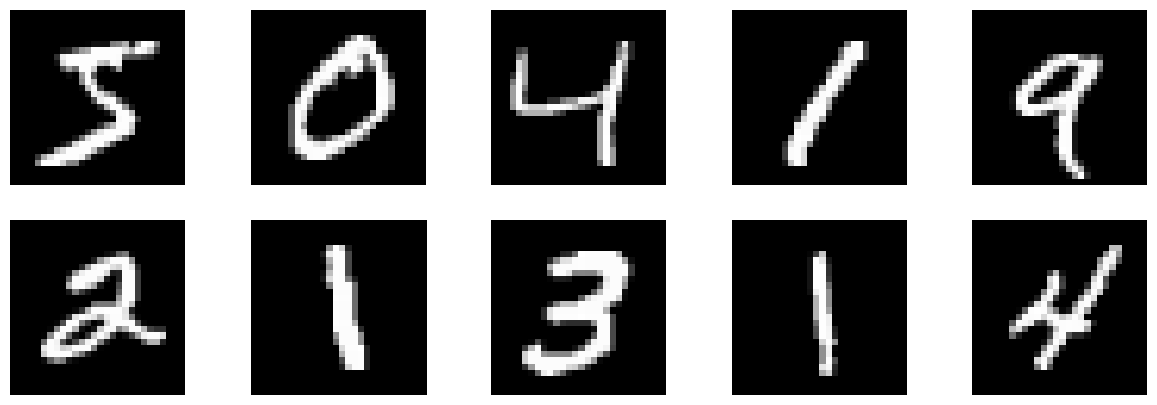

In [15]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(2, 5, figsize=(15,5))
x = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(x_train[x], cmap="gray")
        axs[i,j].axis("off")
        x += 1

x_train.shape

### **MNIST Fashion (classification)**

(60000, 28, 28)

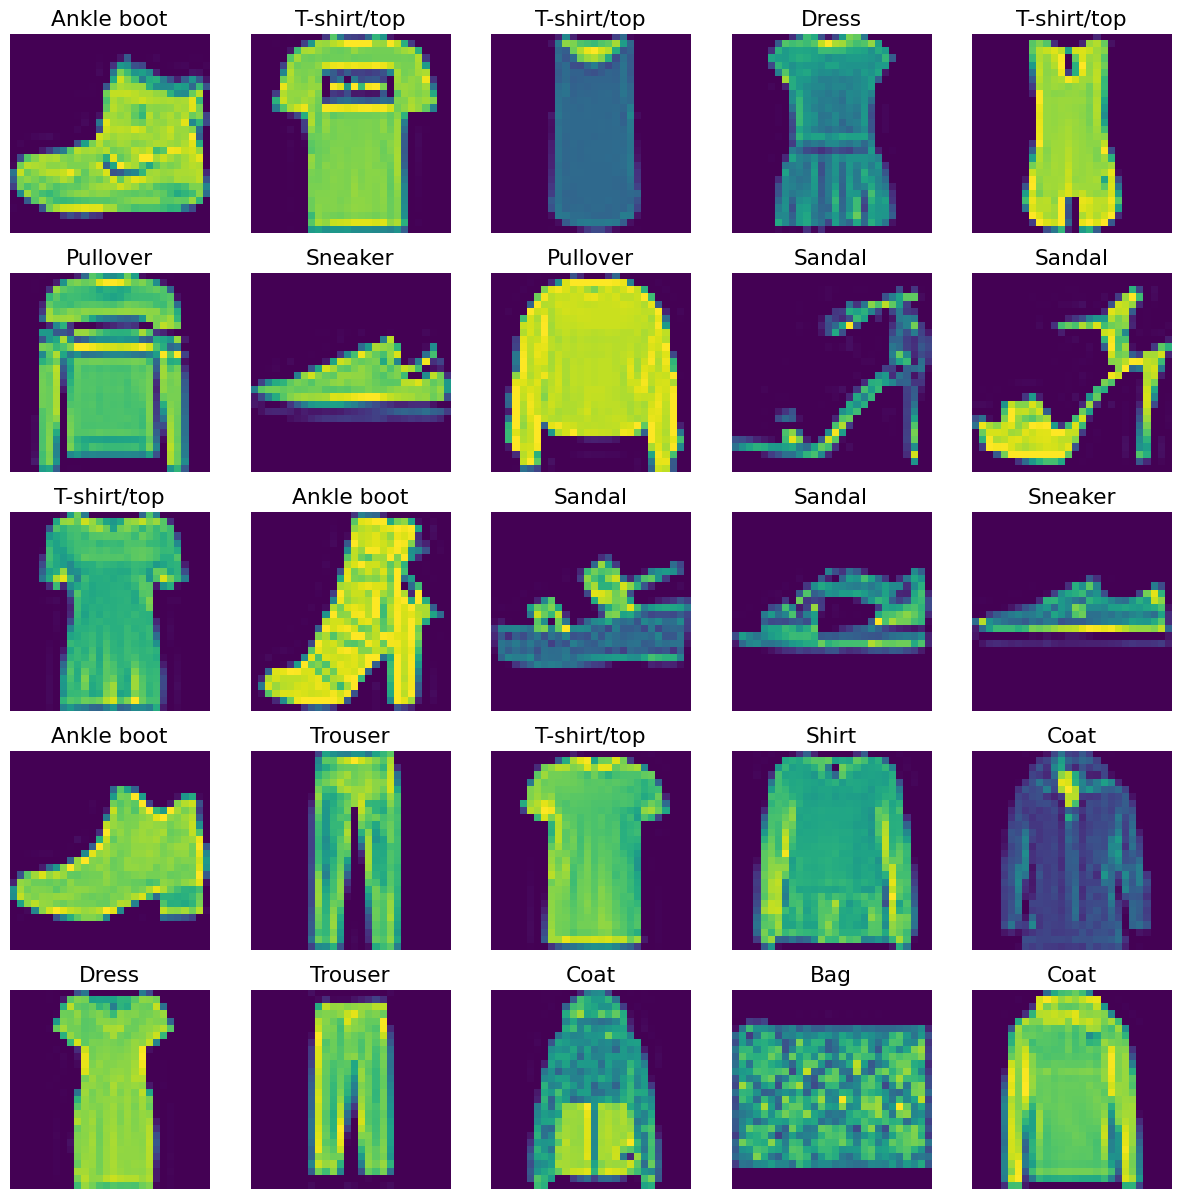

In [16]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

clothing_dict = {
    0: 'T-shirt/top',
    1: 'Trouser', 
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag',
    9: 'Ankle boot'
}

fig, axs = plt.subplots(5, 5, figsize=(15,15))
x = 0
for i in range(5):
    for j in range(5):
        axs[i,j].set_title(clothing_dict[y_train[x]])
        axs[i,j].imshow(x_train[x])
        axs[i,j].axis("off")
        x += 1

x_train.shape

## **Astronomical datasets**

- [AstroML](https://www.astroml.org/user_guide/datasets.html)\
      - SDSS photometry\
      - time-series data (light curves)\
      - spectroscopy

- galaxy classification\
      - [AstroNN](https://astronn.readthedocs.io/en/latest/#)\
      - [Galaxy Zoo](https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge/data)

- artificial dataset (more advanced)\
      - simulate X-ray spectra ([Xspec](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node72.html))\
      - simulate gamma-ray burst ([cosmogrb](https://github.com/grburgess/cosmogrb))\
      - simulate X-ray images ([pyxsim](https://hea-www.cfa.harvard.edu/~jzuhone/pyxsim/), [SIXTE](https://www.sternwarte.uni-erlangen.de/sixte/))

In [17]:
#!pip install astroML

In [18]:
#!pip install astroNN

### **SDSS photometry (clustering)**

In [19]:
from astroML.plotting import MultiAxes
from astroML.datasets import fetch_dr7_quasar

data = fetch_dr7_quasar()

pd.DataFrame(data)

,sdssID,RA,dec,redshift,mag_u,err_u,mag_g,err_g,mag_r,err_r,...,err_i,mag_z,err_z,mag_J,err_J,mag_H,err_H,mag_K,err_K,specobjid
0,b'000006.53+0030',0.027228,0.515341,1.8246,20.384001,0.065,20.461000,0.034,20.323999,0.038,...,0.041,20.042000,0.121,0.000,0.000,0.000,0.000,0.0,0.0,193034571183292416
1,b'000008.13+0016',0.033900,0.276301,1.8373,20.242001,0.054,20.205999,0.024,19.941000,0.032,...,0.032,19.177999,0.068,17.351,0.291,0.000,0.000,0.0,0.0,193034571195875328
2,b'000009.26+1517',0.038604,15.298477,1.1985,19.916000,0.042,19.806999,0.036,19.374001,0.017,...,0.023,19.312000,0.069,0.000,0.000,0.000,0.000,0.0,0.0,211612125330669568
3,b'000009.38+1356',0.039089,13.938450,2.2342,19.233000,0.026,18.886000,0.022,18.427000,0.018,...,0.024,18.084000,0.033,17.263,0.272,0.000,0.000,0.0,0.0,211330580493631488
4,b'000009.42-1027',0.039271,-10.464426,1.8449,19.242001,0.036,19.018999,0.027,18.966000,0.021,...,0.018,18.705000,0.047,0.000,0.000,0.000,0.000,0.0,0.0,183182688176308224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105778,b'235958.21+0051',359.992552,0.861057,2.0387,19.247000,0.034,18.985001,0.021,18.770000,0.017,...,0.033,18.423000,0.036,0.000,0.000,16.885,0.306,0.0,0.0,109153258559242240
105779,b'235958.66-0112',359.994452,-1.207033,1.7718,18.858000,0.041,18.771999,0.030,18.711000,0.020,...,0.020,18.455000,0.037,0.000,0.000,0.000,0.000,0.0,0.0,193034570176659456
105780,b'235958.72+0033',359.994688,0.562592,1.6937,19.874001,0.050,19.872000,0.028,19.711000,0.030,...,0.026,19.353001,0.069,0.000,0.000,0.000,0.000,0.0,0.0,193034571158126592
105781,b'235959.06-0909',359.996092,-9.162233,1.2834,18.421000,0.021,18.351999,0.015,18.139999,0.024,...,0.022,18.045000,0.036,17.410,0.320,0.000,0.000,0.0,0.0,183182689220689920


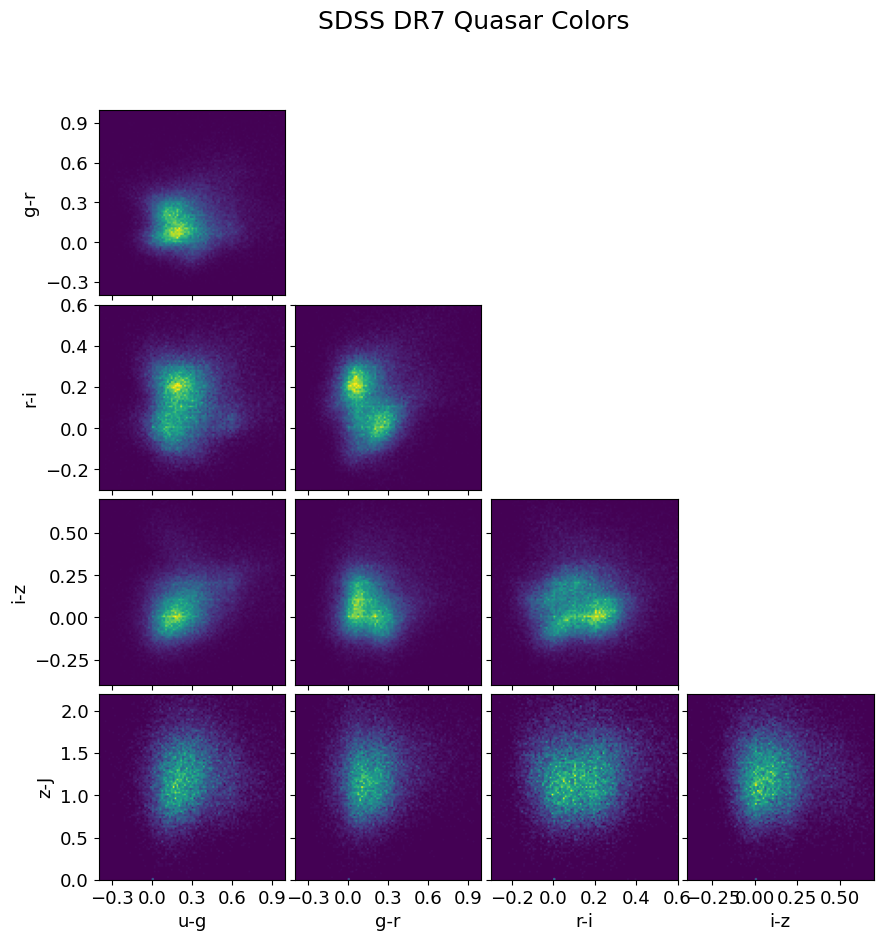

In [20]:
colors = np.empty((len(data), 5))

colors[:, 0] = data['mag_u'] - data['mag_g']
colors[:, 1] = data['mag_g'] - data['mag_r']
colors[:, 2] = data['mag_r'] - data['mag_i']
colors[:, 3] = data['mag_i'] - data['mag_z']
colors[:, 4] = data['mag_z'] - data['mag_J']

labels = ['u-g', 'g-r', 'r-i', 'i-z', 'z-J']

bins = [np.linspace(-0.4, 1.0, 100),
        np.linspace(-0.4, 1.0, 100),
        np.linspace(-0.3, 0.6, 100),
        np.linspace(-0.4, 0.7, 100),
        np.linspace(0, 2.2, 100)]

ax = MultiAxes(5, wspace=0.05, hspace=0.05,
               fig=plt.figure(figsize=(10, 10)))
ax.density(colors, bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))
plt.suptitle('SDSS DR7 Quasar Colors', fontsize=18);

### **RR Lyrae (classification)**

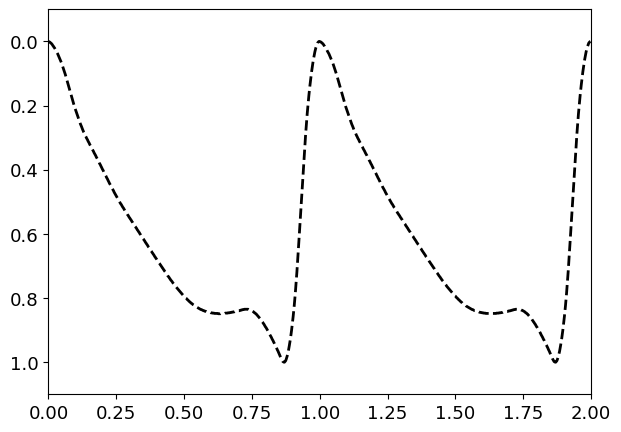

In [21]:
from astroML.datasets import fetch_rrlyrae_templates

templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T

# Plot the results
fig, ax = plt.subplots(figsize=(7, 5))

# plot the true value and the k-term reconstruction
ax.plot(np.concatenate([x, 1 + x]),
        np.concatenate([y, y]), '--k', lw=2)

ax.set_xlim(0, 2)
ax.set_ylim(1.1, -0.1);

### **SDSS spectra (classification, clustering)**

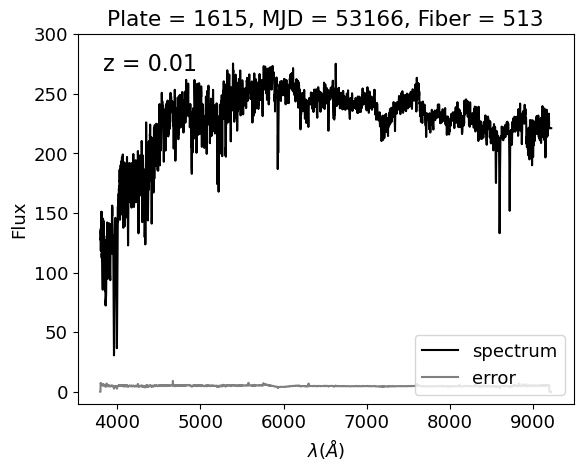

In [22]:
from astroML.datasets import fetch_sdss_spectrum

# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
ax.set_ylim(-10, 300);

### **Galaxy10 (classification)**

In [23]:
from astroNN.datasets import load_galaxy10sdss
# from astroNN.datasets import load_galaxy10  # size = 2.7GB

(X, y) = load_galaxy10sdss()

/home/plsek/.astroNN/datasets/Galaxy10.h5 was found!


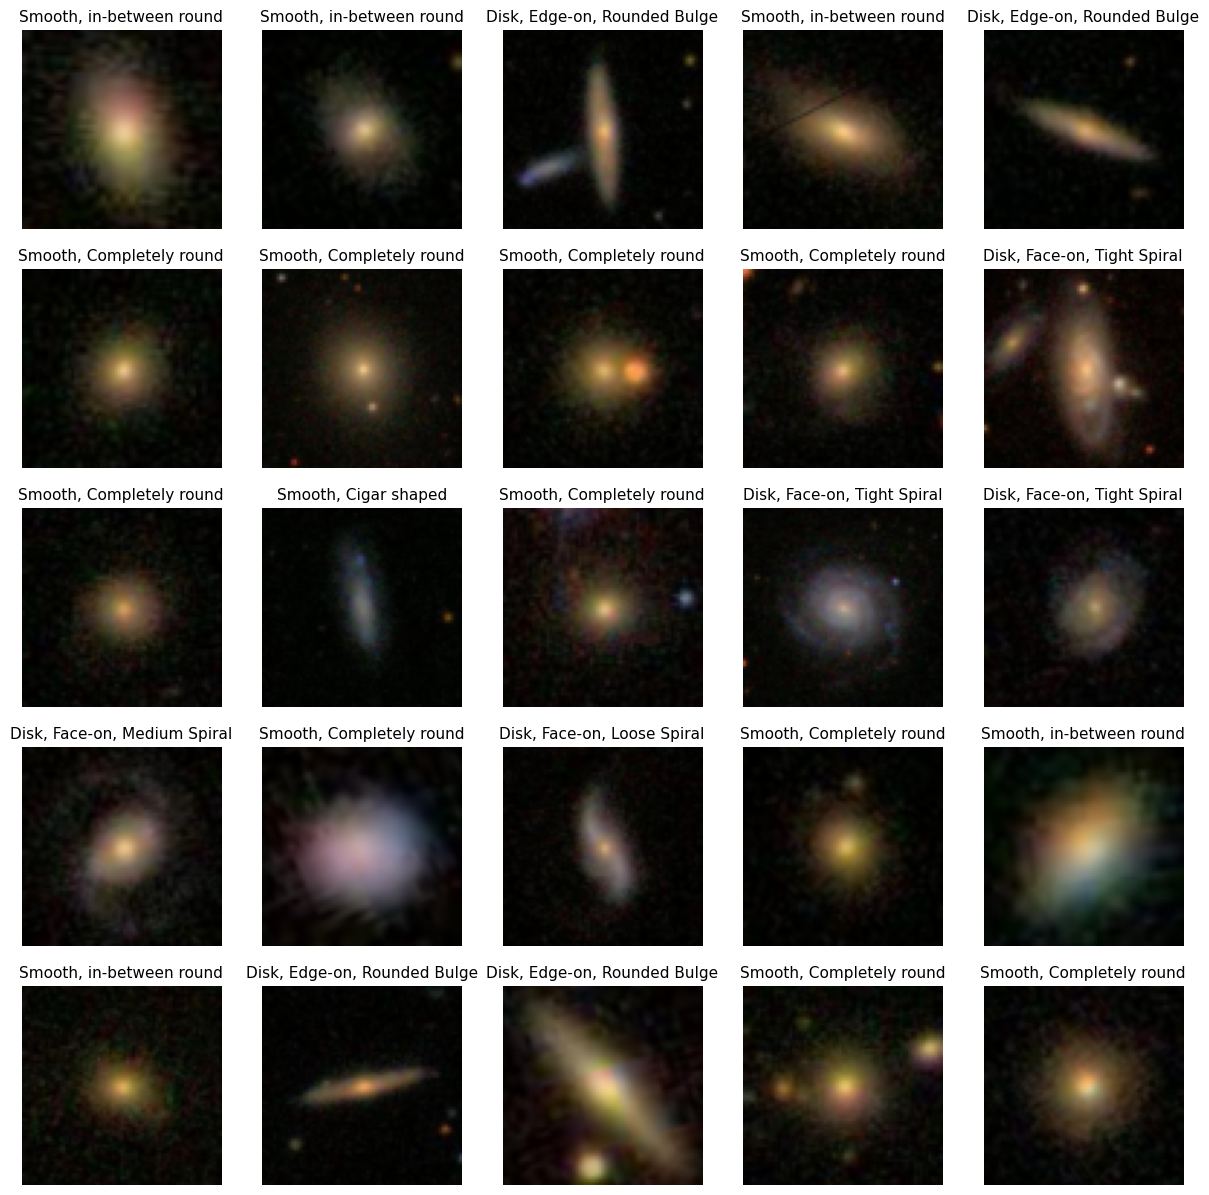

In [24]:
names = {
    0 : 'Disk, Face-on, No Spiral',
    1 : 'Smooth, Completely round', 
    2 : 'Smooth, in-between round',
    3 : 'Smooth, Cigar shaped',
    4 : 'Disk, Edge-on, Rounded Bulge',
    5 : 'Disk, Edge-on, Boxy Bulge',
    6 : 'Disk, Edge-on, No Bulge',
    7 : 'Disk, Face-on, Tight Spiral',
    8 : 'Disk, Face-on, Medium Spiral',
    9 : 'Disk, Face-on, Loose Spiral'
}

fig, axs = plt.subplots(5,5, figsize=(15,15))
n = 0
for i in range(5):
    for j in range(5):
        axs[i,j].set_title(names[y[n]], size=11)
        axs[i,j].imshow(X[n])
        axs[i,j].axis("off")
        n += 1

$\,$

# ***Today: Star vs QSO***

<img src="https://cdn.mos.cms.futurecdn.net/HgaCHZDNppE6e52yeDACo6-970-80.jpg.webp" align=left width=400> 
<img src="https://earthsky.org/upl/2021/01/supermassive-black-hole-artist-e1610556964639.jpg" align=right width=400>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


## **Sloan Digital Sky Survey (SDSS)**

- photometry & spectroscopy

- fotometry 1 billion objects

- spectroscopy 6 million objects

- **stars** from our Galaxy  &  **quasars** up to $z \approx 6$

- color system `u g r i z`

<img src="https://www.astroml.org/_images/fig_sdss_filters_1.png" align=left width=500>

In [25]:
!wget -c "https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB" -O "sdss_photo.csv"

--2023-10-03 19:49:12--  https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving drive.google.com (drive.google.com)... 142.251.36.142, 2a00:1450:4014:80e::200e
Connecting to drive.google.com (drive.google.com)|142.251.36.142|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



### **task 1:** load the data from `sdss_photo.csv` and examine them (mean, std, how many stars/QSOs)

In [26]:
data = pd.read_csv("sdss_photo.csv")

In [27]:
data

,u,g,r,i,z,target
0,19.240999,17.525999,16.840000,16.613001,16.492001,star
1,19.732000,18.339001,17.767000,17.580000,17.481001,star
2,16.120001,15.232000,14.933000,14.845000,14.827000,star
3,18.995001,18.150999,17.877001,17.747000,17.766001,star
4,19.032000,18.112000,17.848000,17.709999,17.712000,star
...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO


In [28]:
data.describe().round(2)

,u,g,r,i,z
count,867.00,867.00,867.00,867.00,867.00
mean,19.29,18.17,17.72,17.54,17.45
std,1.39,1.33,1.35,1.37,1.38
min,15.67,14.36,14.12,13.95,13.89
25%,18.50,17.29,16.74,16.54,16.45
50%,19.33,18.33,17.88,17.69,17.62
75%,20.02,19.09,18.76,18.61,18.52
max,26.43,25.17,21.14,20.72,20.91


In [29]:
sum((data["target"] == "star").astype(int)), sum((data["target"] == "QSO").astype(int))

(655, 212)

### **task 2:** divide the data into two groups (stars & QSOs) and compare them graphically

In [30]:
filters = ["u", "g", "r", "i", "z"]

qso = data["target"] == "QSO"
star = data["target"] == "star"

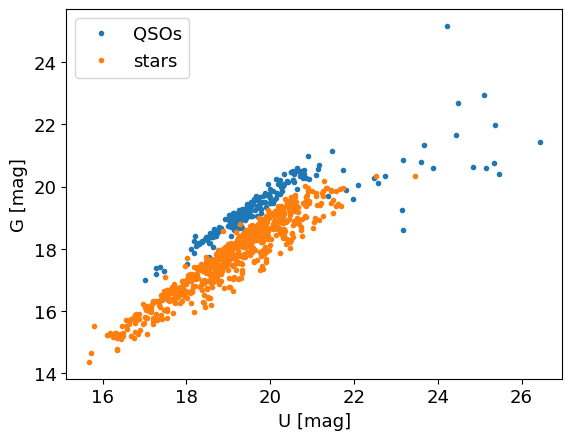

In [31]:
plt.plot(data.loc[qso, "u"], data.loc[qso, "g"], ".", label="QSOs")
plt.plot(data.loc[star, "u"], data.loc[star, "g"], ".", label="stars")

plt.xlabel("U [mag]")
plt.ylabel("G [mag]")
plt.legend();

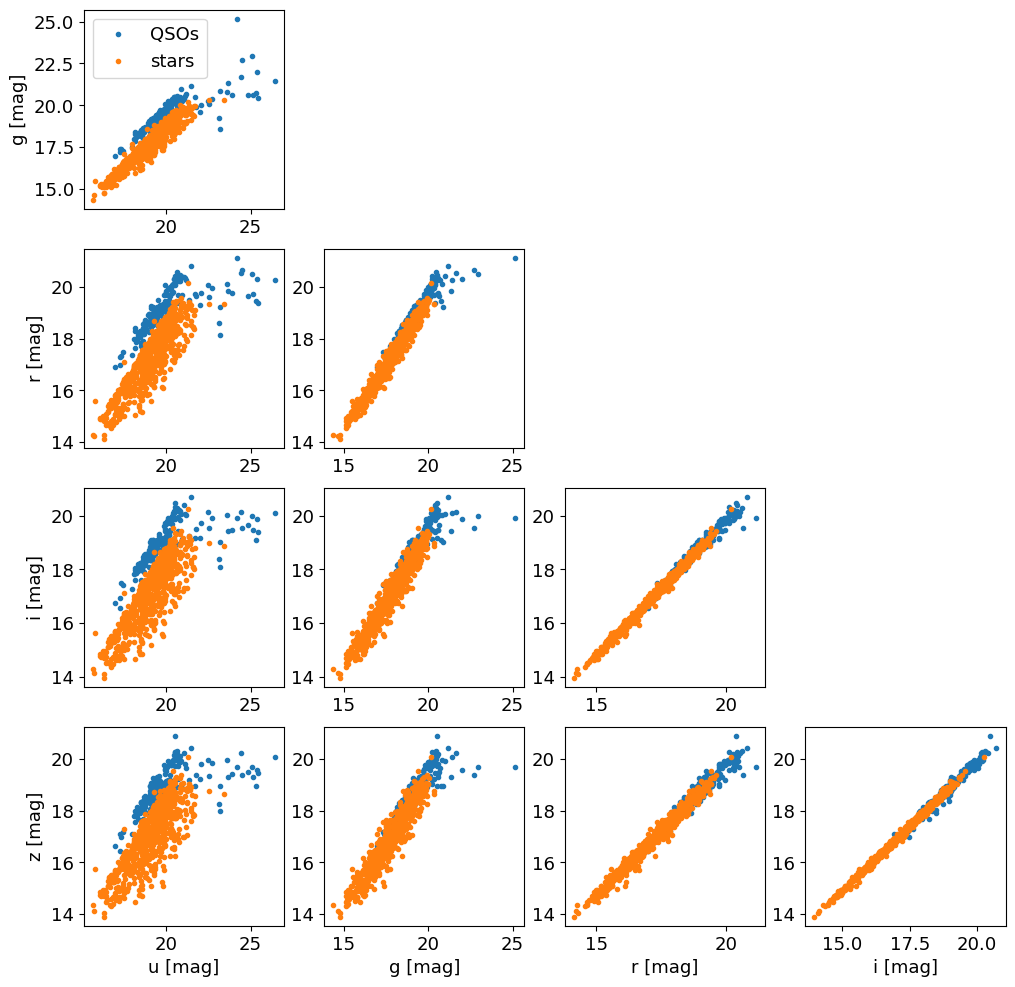

In [32]:
plt.figure(figsize=(15,15))

x = 0
for i in range(5):
    for j in range(5):
        x += 1
        if i == j: continue
        elif i < j: continue
        
        f1 = filters[i]
        f2 = filters[j]
        
        plt.subplot(5,5,x)
        plt.plot(data.loc[qso, f2], data.loc[qso, f1], ".", label="QSOs")
        plt.plot(data.loc[star, f2], data.loc[star, f1], ".", label="stars")

        if i == 4: plt.xlabel(f2 + " [mag]")
        if j == 0: plt.ylabel(f1 + " [mag]")
        if x == 6: plt.legend()

### **task 3:** compute color indices from neighbouring filters and plot them

In [33]:
data["u-g"] = data["u"] - data["g"]
data["g-r"] = data["g"] - data["r"]
data["r-i"] = data["r"] - data["i"]
data["i-z"] = data["i"] - data["z"]

In [34]:
data

,u,g,r,i,z,target,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,star,1.715000,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,star,1.393000,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,star,0.888000,0.299001,0.087999,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,star,0.844002,0.273998,0.130001,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,star,0.920000,0.264000,0.138000,-0.002001
...,...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO,0.199999,0.384001,0.035999,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO,5.004000,1.168001,0.153000,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO,0.335999,-0.092999,0.382999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO,0.044001,0.313000,0.041000,0.039000


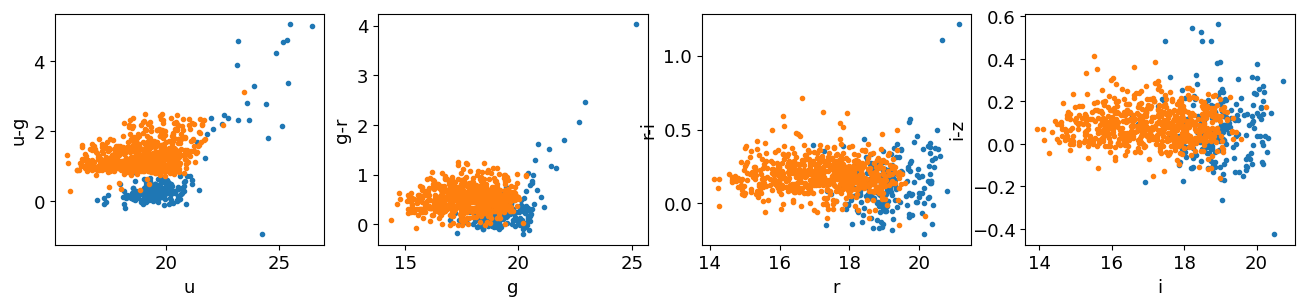

In [35]:
plt.figure(figsize=(16,3))
for i in range(4):
    index = filters[i]+"-"+filters[i+1]

    plt.subplot(1,4,i+1)
    plt.plot(data.loc[qso, filters[i]], data.loc[qso, index], ".", label="QSOs")
    plt.plot(data.loc[star, filters[i]], data.loc[star, index], ".", label="stars")

    plt.xlabel(filters[i])
    plt.ylabel(index)

### **task 4:** pick an index / combination of indices & filters and write single condition that best divides the two groups

example:

`u-g < 1.0` &rarr; QSO

and make a new column `data["guess"]`

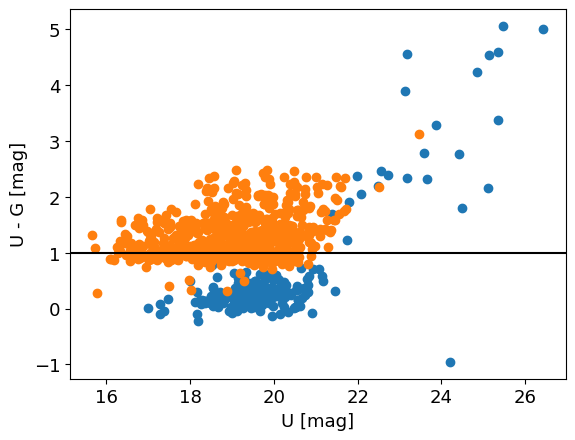

In [36]:
plt.plot(data.loc[qso, "u"], data.loc[qso, "u-g"], "o", label="QSOs")
plt.plot(data.loc[star, "u"], data.loc[star, "u-g"], "o", label="stars");

plt.axhline(1.0, color="black")
plt.xlabel("U [mag]")
plt.ylabel("U - G [mag]");

In [37]:
data["guess"] = "star"

data.loc[data["u-g"] < 1.0, "guess"] = "QSO"

In [38]:
data

,u,g,r,i,z,target,u-g,g-r,r-i,i-z,guess
0,19.240999,17.525999,16.840000,16.613001,16.492001,star,1.715000,0.685999,0.226999,0.121000,star
1,19.732000,18.339001,17.767000,17.580000,17.481001,star,1.393000,0.572001,0.187000,0.098999,star
2,16.120001,15.232000,14.933000,14.845000,14.827000,star,0.888000,0.299001,0.087999,0.018001,QSO
3,18.995001,18.150999,17.877001,17.747000,17.766001,star,0.844002,0.273998,0.130001,-0.019001,QSO
4,19.032000,18.112000,17.848000,17.709999,17.712000,star,0.920000,0.264000,0.138000,-0.002001,QSO
...,...,...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO,0.199999,0.384001,0.035999,-0.043999,QSO
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO,5.004000,1.168001,0.153000,0.035000,star
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO,0.335999,-0.092999,0.382999,0.184000,QSO
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO,0.044001,0.313000,0.041000,0.039000,QSO


### **task 5:** estimate how many datapoints were guessed correctly

hint: compare column `data["guess"]` with column `data["target"]`\
hint2: if you do `sum([True, True, False])` you get number of `True` occurences in the list

In [39]:
N = len(data["target"])
correct = (data["guess"] == data["target"])

N, sum(correct), sum(correct) / N * 100

(867, 683, 78.77739331026528)

In [40]:
len(data.loc[qso, "u"]), len(data.loc[star, "u"])

(212, 655)

In [41]:
len(data.loc[star, "u"]) / N * 100

75.54786620530565

In [42]:
correct_QSO = sum(correct & qso)
len(data.loc[qso, "u"]), correct_QSO, correct_QSO / len(data.loc[qso, "u"]) * 100

(212, 188, 88.67924528301887)

In [43]:
correct_star = sum(correct & star)
len(data.loc[star, "u"]), correct_star, correct_star / len(data.loc[star, "u"]) * 100

(655, 495, 75.57251908396947)

### **Scikit-learn naming convention**

```python
X = [[5.1, 3.5, 1.4, 0.2],
     [4.9, 3.1, 0.4, 0.3],
     [4.7, 3.2, 1.3, 0.2],
     [5.0, 3.6, 1.1, 0.2],
     [5.1, 3.5, 1.4, 0.2]]

y = ["versicolor", "setosa", "virginica", "setosa", "versicolor"]


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X, y)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)
```

### **task 6:** create `X` a `y` variables

hint:

use original dataframe `data`

u, u-g  &rarr;  `X`

`y`:  $\,$QSO &rarr; 0\
&nbsp; &nbsp; &nbsp; &nbsp; star &rarr; 1

In [44]:
X = data[["u", "u-g"]]

X

,u,u-g
0,19.240999,1.715000
1,19.732000,1.393000
2,16.120001,0.888000
3,18.995001,0.844002
4,19.032000,0.920000
...,...,...
862,19.247000,0.199999
863,26.433001,5.004000
864,20.535999,0.335999
865,20.627001,0.044001


In [45]:
target = data["target"].apply(lambda x: 0 if x == "star" else 1)

y = np.array(target)

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### **task 7:** for scikit-learn import `DecisionTreeClassifier` and use its `fit()` method

<img src="https://www.researchgate.net/profile/Amir-Akbari-19/publication/348456545/figure/fig1/AS:981743439994883@1611077284634/Schematic-of-a-Decision-Tree-The-figure-shows-an-example-of-a-decision-tree-with-3.png" width=400>

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X, y)

DecisionTreeClassifier(max_depth=5)

### **task 8:** use method predict on the `X` variable and compare the output to `y`

In [49]:
guess = dt.predict(X)

In [50]:
N = len(y)
correct = sum((guess == y).astype(int))
N, correct, correct / N * 100

(867, 862, 99.4232987312572)

### **Confusion matrix**

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

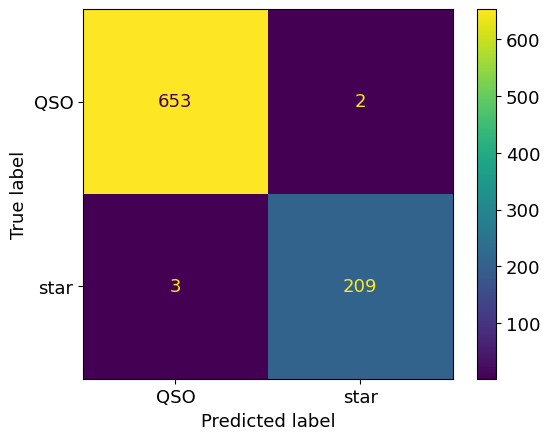

In [52]:
ConfusionMatrixDisplay.from_estimator(dt, X, y, display_labels=["QSO", "star"]);

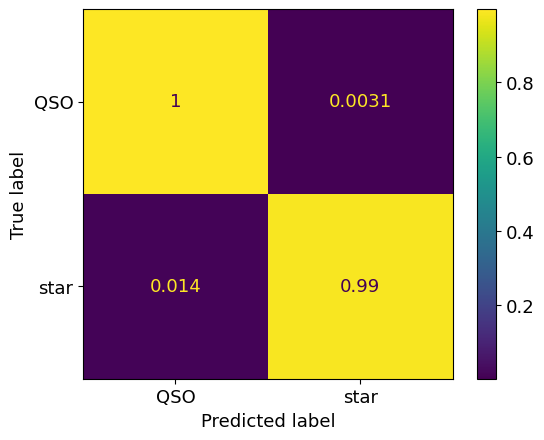

In [53]:
ConfusionMatrixDisplay.from_estimator(dt, X, y, display_labels=["QSO", "star"], normalize='true');

### **Decision tree visualization**

In [54]:
from sklearn.tree import plot_tree

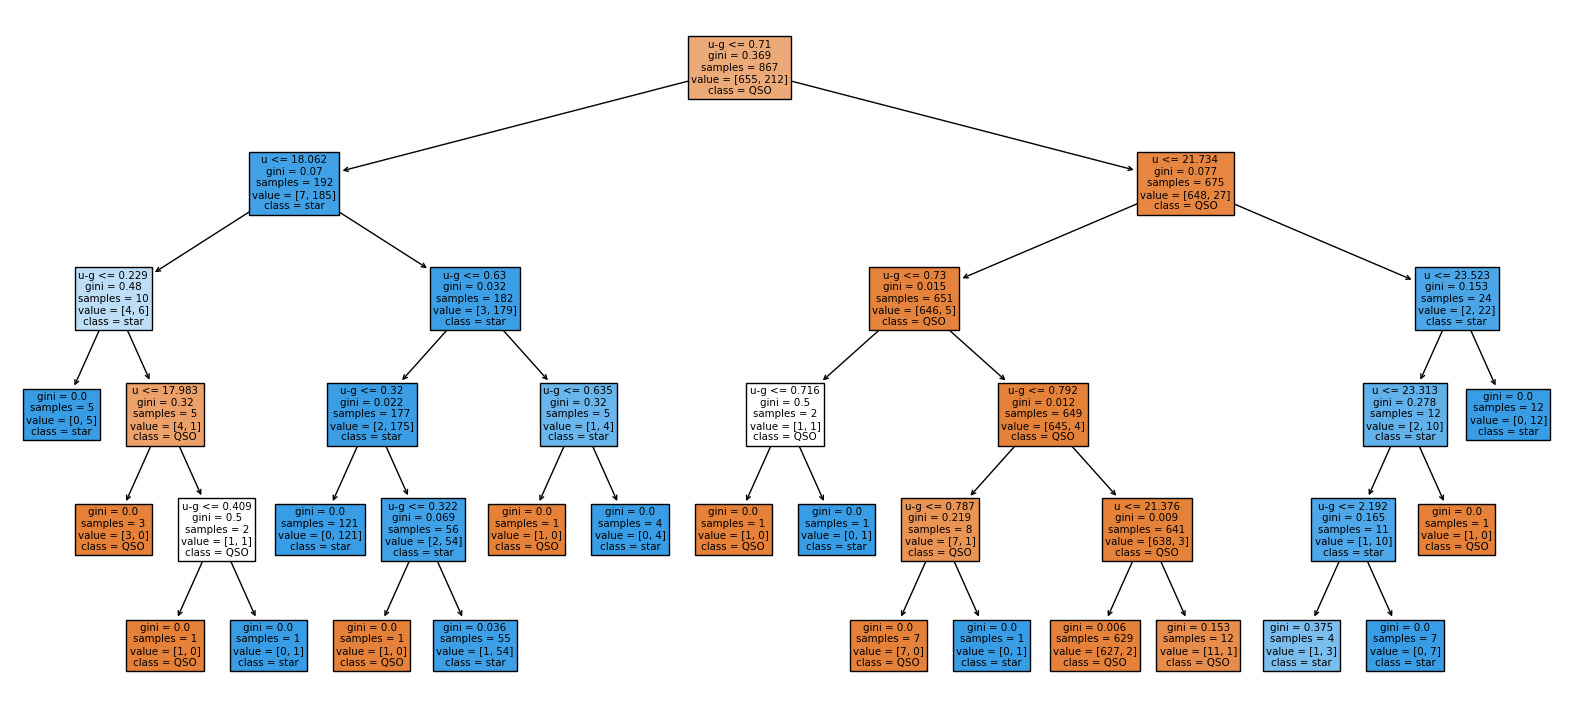

In [55]:
fig, ax = plt.subplots(figsize=(20,9))
plot_tree(dt, 
          feature_names=X.columns,
          class_names=["QSO", "star"],
          filled=True, 
          ax=ax);

In [56]:
# !pip install dtreeviz
# from dtreeviz import dtreeviz

In [57]:
# viz = dtreeviz(dt2, X, y,
#                feature_names=X.columns,
#                class_names=["QSO", "star"])

# viz

### **Decision surface**

In [58]:
def plot_decision_surface(classifier, data, col1, col2):
    # Number of points in the grid
    size = 100

    # Create U & U-G meshgrid
    range_X = np.linspace(min(data[col1]), max(data[col1]), size)
    range_Y = np.linspace(min(data[col2]), max(data[col2]), size)
    X, Y = np.meshgrid(range_X, range_Y)
    grid = np.vstack((X.flatten(), Y.flatten())).T
    grid = pd.DataFrame(data=grid, columns=[col1,col2])

    # Predict classes for the whole grid of values
    predicted = classifier.predict(grid)

    # Reshape back to 100x100 and plot countours
    predicted = predicted.reshape(size,size)
    plt.contourf(X, Y, predicted)
    
    # Overplot with datapoints
    plt.plot(data.loc[qso, col1], data.loc[qso, col2], "o")
    plt.plot(data.loc[star, col1], data.loc[star, col2], "o");    
    plt.xlabel(f"{col1} [mag]")
    plt.ylabel(f"{col2} [mag]");

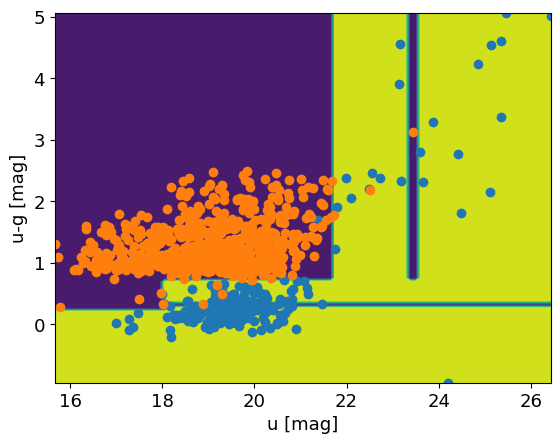

In [59]:
plot_decision_surface(dt, data, col1="u", col2="u-g")

### **Is that a good model?**

<h1 style="padding-left:250px">Overfitting vs Underfitting</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1024px-Overfitting.svg.png" style="padding-left:80px" width=600>

### **task 9:** split the data in the 9:1 ratio, train on 90% and test on 10% of data

hint: use can use `train_test_split`

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, shuffle=True)

In [62]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [63]:
dt2 = DecisionTreeClassifier(max_depth=5)

dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
dt2.score(X_test, y_test)

0.9447004608294931

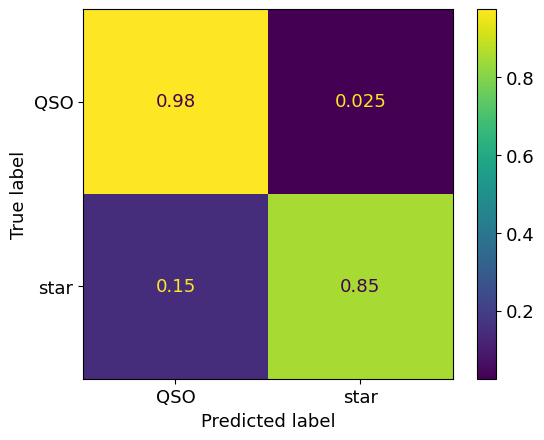

In [65]:
ConfusionMatrixDisplay.from_estimator(dt2, X_test, y_test, display_labels=["QSO", "star"], normalize='true');

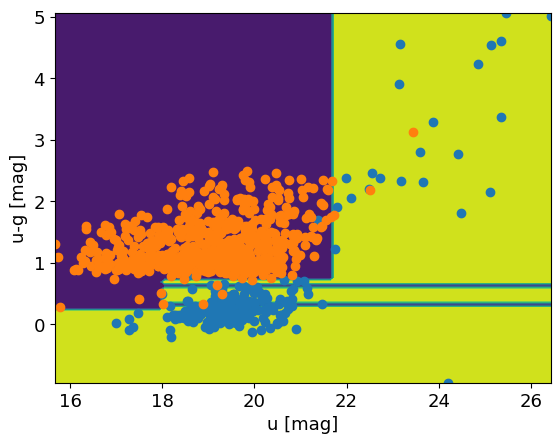

In [66]:
plot_decision_surface(dt2, data, col1="u", col2="u-g")

### **task 10:** import `RandomForestClassifier` and repeat tasks 8 & 9

![](https://miro.medium.com/max/1200/1*hmtbIgxoflflJqMJ_UHwXw.jpeg)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [69]:
rf.score(X_test, y_test)

0.9815668202764977

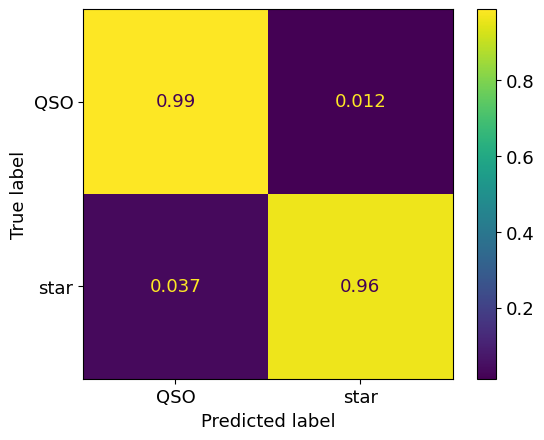

In [70]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=["QSO", "star"], normalize='true');

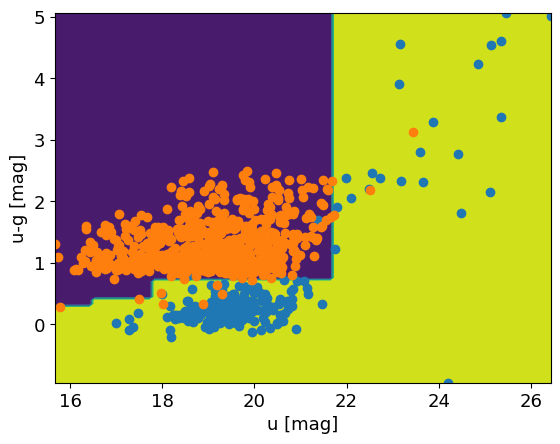

In [71]:
plot_decision_surface(rf, data, col1="u", col2="u-g")

In [72]:
len(rf.estimators_)

10

In [73]:
# viz = dtreeviz(rf.estimators_[0], X_train, y_train,
#                feature_names=X.columns,
#                class_names=["QSO", "star"])

# viz

In [74]:
# viz = dtreeviz(rf.estimators_[1], X_train, y_train,
#                feature_names=X.columns,
#                class_names=["QSO", "star"])

# viz

### **task 11:** choose a source and apply the model

http://skyserver.sdss.org/dr7/en/tools/search/radial.asp

In [75]:
u = 15.914
g = 15.500
r = 16.2
i = 16.5
z = 17.1

obj = pd.DataFrame(data=np.array([[u, u-g]]), columns=["u","u-g"])
rf.predict(obj)

array([0])

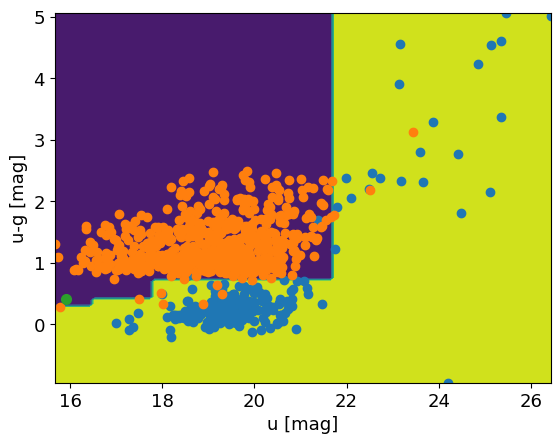

In [76]:
plot_decision_surface(rf, data, col1="u", col2="u-g")

plt.plot(u, u-g, "o", ms=7)